**Projet de la statistique bivariée avec les test complet**

**Statistique bivariée & tests statistiques**
    
  Analyse de la relation entre deux variables + introduction aux tests statistiques
(Dataset :Employers_data.csv)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
df=pd.read_csv("Employers_data.csv",sep=";")

In [6]:
df

,Employee_ID,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,1,Merle Ingram,24,Female,Engineering,Engineer,1,Master,Austin,90000
1,2,John Mayes,56,Male,Sales,Executive,33,Master,Seattle,195000
2,3,Carlos Wille,21,Male,Engineering,Intern,1,Bachelor,New York,35000
3,4,Michael Bryant,30,Male,Finance,Analyst,9,Bachelor,New York,75000
4,5,Paula Douglas,25,Female,HR,Analyst,2,Master,Seattle,70000
...,...,...,...,...,...,...,...,...,...,...
9995,9996,Thomas Rossin,51,Male,Sales,Executive,28,Master,Austin,185000
9996,9997,Christie King,36,Female,Sales,Executive,9,PhD,San Francisco,165000
9997,9998,Alfred Keller,57,Male,Sales,Executive,30,PhD,New York,200000
9998,9999,Margaret Gomez,37,Female,Engineering,Manager,14,Master,New York,135000


## Introduction aux tests statistiques

###  Pourquoi faire un test statistique ?

Un test statistique permet de répondre à des questions du type :

- *Les moyennes de deux groupes sont-elles vraiment différentes ?*
- *Cette corrélation est-elle significativement différente de 0 ?*
- *Deux variables qualitatives sont-elles indépendantes ?*

Comme on travaille sur un **échantillon**, on ne peut pas être sûr à 100 %.  
Un test statistique permet de décider si l'effet observé est **compatible avec le hasard** ou non.

### 0.2 Hypothèses H0 et H1

Pour chaque test, on pose :

- **H0 (hypothèse nulle)** : "rien ne se passe", aucune différence, aucune relation.
- **H1 (hypothèse alternative)** : il y a une différence, une relation, un effet.

Exemples :

- t-test :  
  - H0 : les deux moyennes sont égales  
  - H1 : les moyennes sont différentes  

- Chi² :  
  - H0 : les deux variables qualitatives sont indépendantes  
  - H1 : elles sont associées  


   **p-valeur et seuil de décision**
  La p-valeur est la probabilité d’obtenir un résultat au moins aussi extrême que celui observé,en supposant H0 vraie.

 Règle pratique la plus courante :

     si p-valeur < 0.05 → on rejette H0 (effet significatif au seuil de 5 %)
     si p-valeur ≥ 0.05 → on ne rejette pas H0 (pas assez de preuves pour conclure)

###  Tests paramétriques vs non paramétriques

 - **Paramétriques** : reposent sur des hypothèses fortes (normalité, variances homogènes)  
   → t-test, ANOVA, corrélation de Pearson…

 - **Non paramétriques** : reposent sur les rangs ou les ordres  
   → Mann–Whitney, Wilcoxon, Kruskal–Wallis, Spearman, Kendall…

  Avant de choisir un test, on vérifie donc :

 1. **Type de variables** (quanti / quali)  
 2. **Nombre de groupes** (2 ou plus)  
 3. **Normalité approximative** (Shapiro, histogrammes)  
 4. **Homogénéité des variances** (Levene)  
 5. **Taille d’échantillon** (petit / grand)


## Tableau récapitulatif des tests bivariés

| Type de relation | Exemple (dataset) | Graphiques | Tests paramétriques | Tests non paramétriques | Tests quali |
|------------------|-------------------|-----------|----------------------|-------------------------|------------|
| QUANTI ↔ QUANTI | `Age` ↔ `salaire` | scatter plot | Corrélation de Pearson | Spearman, Kendall | — |
| QUALI ↔ QUANTI (2 groupes) | `sexe` → `salaire` | boxplot, violin, barplot | t-test indépendant | Mann–Whitney | — |
| QUALI ↔ QUANTI (3+ groupes) | `niveau_education` → `salaire` | boxplot, barplot | ANOVA | Kruskal–Wallis | — |
| QUALI ↔ QUALI | `sexe` ↔ `niveau_etude` | countplot, heatmap | — | — | Chi², Fisher, V de Cramér |


# CAS 1 — QUANTI ↔ QUANTI
   Exemple : Salary ↔ age

##Tableau synthétique

| Élément | Contenu |
|--------|---------|
| Variables | `age` (X), `salaire` (Y) |
| Graphique | Scatter plot (nuage de points) |
| Indicateurs | Covariance, corrélation de Pearson, Spearman, Kendall |
| Hypothèses (Pearson) | relation linéaire, normalité approximative, peu d’outliers extrêmes |
| Hypothèses (Spearman / Kendall) | relation monotone (Spearman), mesure de la concordance des rangs (Kendall) |


In [17]:
x = df["Salary"]
y = df["Experience_Years"]

cov_xy = np.cov(x, y, ddof=1)[0, 1]

pearson_r, pearson_p = stats.pearsonr(x, y)
spearman_r, spearman_p = stats.spearmanr(x, y)
kendall_tau, kendall_p = stats.kendalltau(x, y)

print("Covariance :", cov_xy)
print(f"Corrélation de Pearson : r = {pearson_r:.3f}, p = {pearson_p:.3e}")
print(f"Corrélation de Spearman : ρ = {spearman_r:.3f}, p = {spearman_p:.3e}")
print(f"Corrélation de Kendall : τ = {kendall_tau:.3f}, p = {kendall_p:.3e}")


Covariance : 378478.84953495377
Corrélation de Pearson : r = 0.898, p = 0.000e+00
Corrélation de Spearman : ρ = 0.913, p = 0.000e+00
Corrélation de Kendall : τ = 0.772, p = 0.000e+00


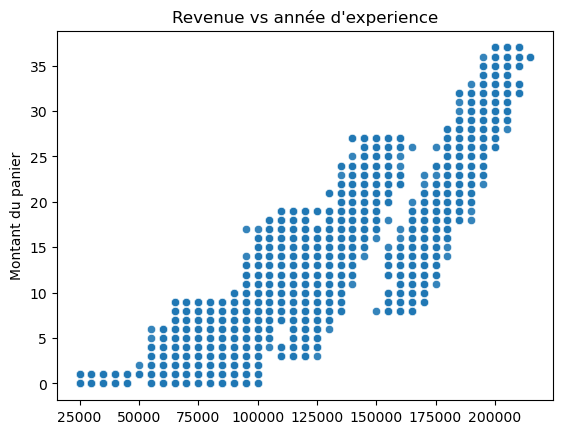

In [23]:
import pandas as pd
import seaborn as sns
plt.figure()
if sns is not None:
    sns.scatterplot(x=x, y=y, alpha=0.9)
else:
    plt.scatter(x, y, alpha=0.9)
plt.xlabel("")
plt.ylabel("Montant du panier")
plt.title("Revenue vs année d'experience")
plt.show()


### 1.2 Interprétation rapide

- Signe de la corrélation → sens de la relation (positive / négative)  
- Valeur absolue → force de la relation (faible / modérée / forte)  
- p-valeur → significativité statistique  

Toujours conclure en français clair, dans le contexte métier.



# QUALI ↔ QUANTI  

On étudie comment une variable **qualitative** influence une variable **quantitative**.


## Tableau synthétique global

| Cas | Exemple | Graphiques | Test paramétrique | Test non paramétrique |
|-----|---------|-----------|-------------------|-----------------------|
| 2 modalités | `sexe` → `salary` | boxplot, violin, barplot | t-test indépendant | Mann–Whitney |
| 3+ modalités | `age` → `niveau_etude` | boxplot, barplot | ANOVA | Kruskal–Wallis |


## Cas 2.a — 2 modalités (`sexe` → `salary`)

Question :  
> Les hommes et les femmes ont le -ils la même salaire ?



### 2.2.1 Tableau synthétique

| Élément | Contenu |
|--------|---------|
| Variables | `sexe` (H/F), `salary` |
| Graphiques | boxplot, violin plot, barplot des moyennes |
| Test paramétrique | t-test indépendant (Welch) |
| Test non paramétrique | Mann–Whitney |
| Hypothèses t-test | normalité approximative par groupe, variances pas trop différentes, indépendance |
| Hypothèses Mann–Whitney | distributions pouvant être non normales, comparaison des niveaux entre deux groupes |


In [27]:
var_quali = "Gender"
var_quanti = "Salary"

df[[var_quali, var_quanti]].groupby(var_quali).describe().T


Gender               Female           Male
Salary count    4892.000000    5108.000000
       mean   114567.661488  116160.924041
       std     46354.334326   45779.405941
       min     25000.000000   25000.000000
       25%     70000.000000   75000.000000
       50%    115000.000000  120000.000000
       75%    145000.000000  150000.000000
       max    210000.000000  215000.000000

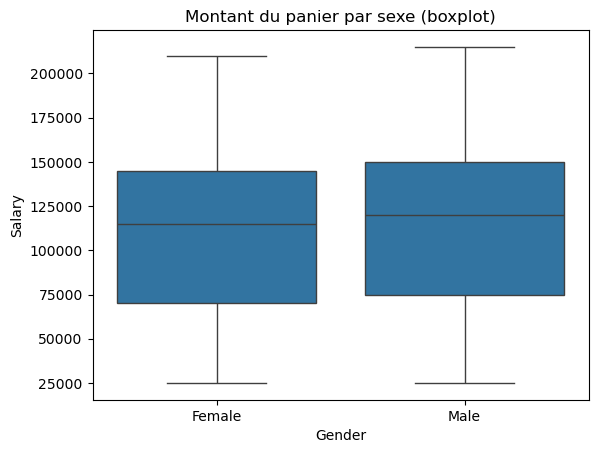

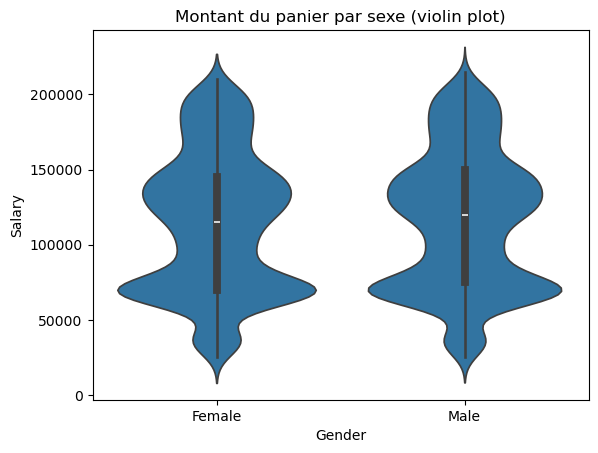

In [28]:
plt.figure()
if sns is not None:
    sns.boxplot(x=var_quali, y=var_quanti, data=df)
else:
    groups = [g[var_quanti].values for _, g in df.groupby(var_quali)]
    labels = df[var_quali].unique()
    plt.boxplot(groups, labels=labels)
plt.title("Montant du panier par sexe (boxplot)")
plt.show()

if sns is not None:
    plt.figure()
    sns.violinplot(x=var_quali, y=var_quanti, data=df)
    plt.title("Montant du panier par sexe (violin plot)")
    plt.show()